# Initial Analysis of 2024 Season

## 1.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.colors as mcolors
import seaborn as sns
import math

# import warnings
# warnings.filterwarnings('ignore')

from datetime import timedelta
# % matplotlib inline

## 1.2 Import fastf1 Libraries and Set Color Scheme

We will be using the open source fastf1 library for accessing up to date season data

In [2]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

# Load FastF1's dark color scheme
ff1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False,
                          color_scheme='fastf1')

## 1.3 Enable Caching (Optional)

If you want to improve performance by caching downloaded fastf1 data, uncomment the following code cell and replace '/path/to/your/directory' with the desired path to your cache directory.

In [3]:
# Enable the cache by providing the name of your cache folder
cache_path = '/Users/charlotte/Desktop/mclaren-performance-analysis-2024/cache'
ff1.Cache.enable_cache(cache_path)

In [4]:
# Define target session
year, grand_prix, session = 2024, 'Miami', 'R'

# Load target session
target_session = ff1.get_session(year, grand_prix, session)
target_session.load(telemetry=True)

# Define target drivers
driver_1, driver_2 = 'NOR', 'VER'
team_1, team_2, team_3 = 'McLaren', 'Ferrari', 'Red Bull Racing'


core           INFO 	Loading data for Miami Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '16', '11', '55', '44', '22', '63', '14', '31', '27', '10', '81', '24', '3', '77', '18', '23', '20', '2']


In [9]:
target_session.laps.columns
# print(target_session.laps)

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [11]:
# Function to lighten a color
def lighten_color(color, amount=0.5):
    color = mcolors.to_rgb(color)
    return [(1 - amount) * c + amount for c in color]

# Retrieve team colors from target_session.results based on driver abbreviations
team_color_1 = '#' + target_session.results[target_session.results['Abbreviation'] == driver_1].iloc[0]['TeamColor']
team_color_2 = '#' + target_session.results[target_session.results['Abbreviation'] == driver_2].iloc[0]['TeamColor']

# Check if they are the same team and adjust if needed
if team_color_1 == team_color_2:
    # Lighten one color for distinction or use a dashed line
    from matplotlib.colors import to_rgb
    team_color_2 = lighten_color(team_color_2, amount=0.3)
    linestyle_2 = '--'
else:
    linestyle_2 = '-'

In [12]:
print(type(target_session))
target_session.results

<class 'fastf1.core.Session'>


,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
4,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,GBR,1.0,1,5.0,NaT,NaT,NaT,0 days 01:30:49.876000,Finished,25.0
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,2.0,2,1.0,NaT,NaT,NaT,0 days 00:00:07.612000,Finished,18.0
16,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,3.0,3,2.0,NaT,NaT,NaT,0 days 00:00:09.920000,Finished,15.0
11,11,S PEREZ,PER,perez,Red Bull Racing,3671C6,red_bull,Sergio,Perez,Sergio Perez,...,MEX,4.0,4,4.0,NaT,NaT,NaT,0 days 00:00:14.650000,Finished,12.0
55,55,C SAINZ,SAI,sainz,Ferrari,E80020,ferrari,Carlos,Sainz,Carlos Sainz,...,ESP,5.0,5,3.0,NaT,NaT,NaT,0 days 00:00:16.407000,Finished,10.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,27F4D2,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,6.0,6,8.0,NaT,NaT,NaT,0 days 00:00:16.585000,Finished,8.0
22,22,Y TSUNODA,TSU,tsunoda,RB,6692FF,rb,Yuki,Tsunoda,Yuki Tsunoda,...,JPN,7.0,7,10.0,NaT,NaT,NaT,0 days 00:00:26.185000,Finished,6.0
63,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,GBR,8.0,8,7.0,NaT,NaT,NaT,0 days 00:00:34.789000,Finished,4.0
14,14,F ALONSO,ALO,alonso,Aston Martin,229971,aston_martin,Fernando,Alonso,Fernando Alonso,...,ESP,9.0,9,15.0,NaT,NaT,NaT,0 days 00:00:37.107000,Finished,2.0
31,31,E OCON,OCO,ocon,Alpine,0093cc,alpine,Esteban,Ocon,Esteban Ocon,...,FRA,10.0,10,13.0,NaT,NaT,NaT,0 days 00:00:39.746000,Finished,1.0


In [13]:
telemetry = target_session.laps.loc[0].get_car_data().add_distance()

In [14]:
telemetry.head()

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2024-05-05 20:03:23.810,10082,0,1,15,True,1,car,0 days 00:00:00.014000,0 days 00:55:43.042000,0.000000
1,2024-05-05 20:03:24.170,10221,0,1,15,True,1,car,0 days 00:00:00.374000,0 days 00:55:43.402000,0.000000
2,2024-05-05 20:03:24.530,7981,10,1,15,False,1,car,0 days 00:00:00.734000,0 days 00:55:43.762000,1.000000
3,2024-05-05 20:03:24.810,6021,16,1,16,False,1,car,0 days 00:00:01.014000,0 days 00:55:44.042000,2.244444
4,2024-05-05 20:03:25.169,4264,30,1,27,False,1,car,0 days 00:00:01.373000,0 days 00:55:44.401000,5.236111


In [15]:
# Access selected driver fastest laps
laps_driver_1 = target_session.laps.pick_drivers(driver_1).pick_fastest()
laps_driver_2 = target_session.laps.pick_drivers(driver_2).pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = laps_driver_1.get_car_data().add_distance()
telemetry_driver_2 = laps_driver_2.get_car_data().add_distance()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


NameError: name 'driver1' is not defined

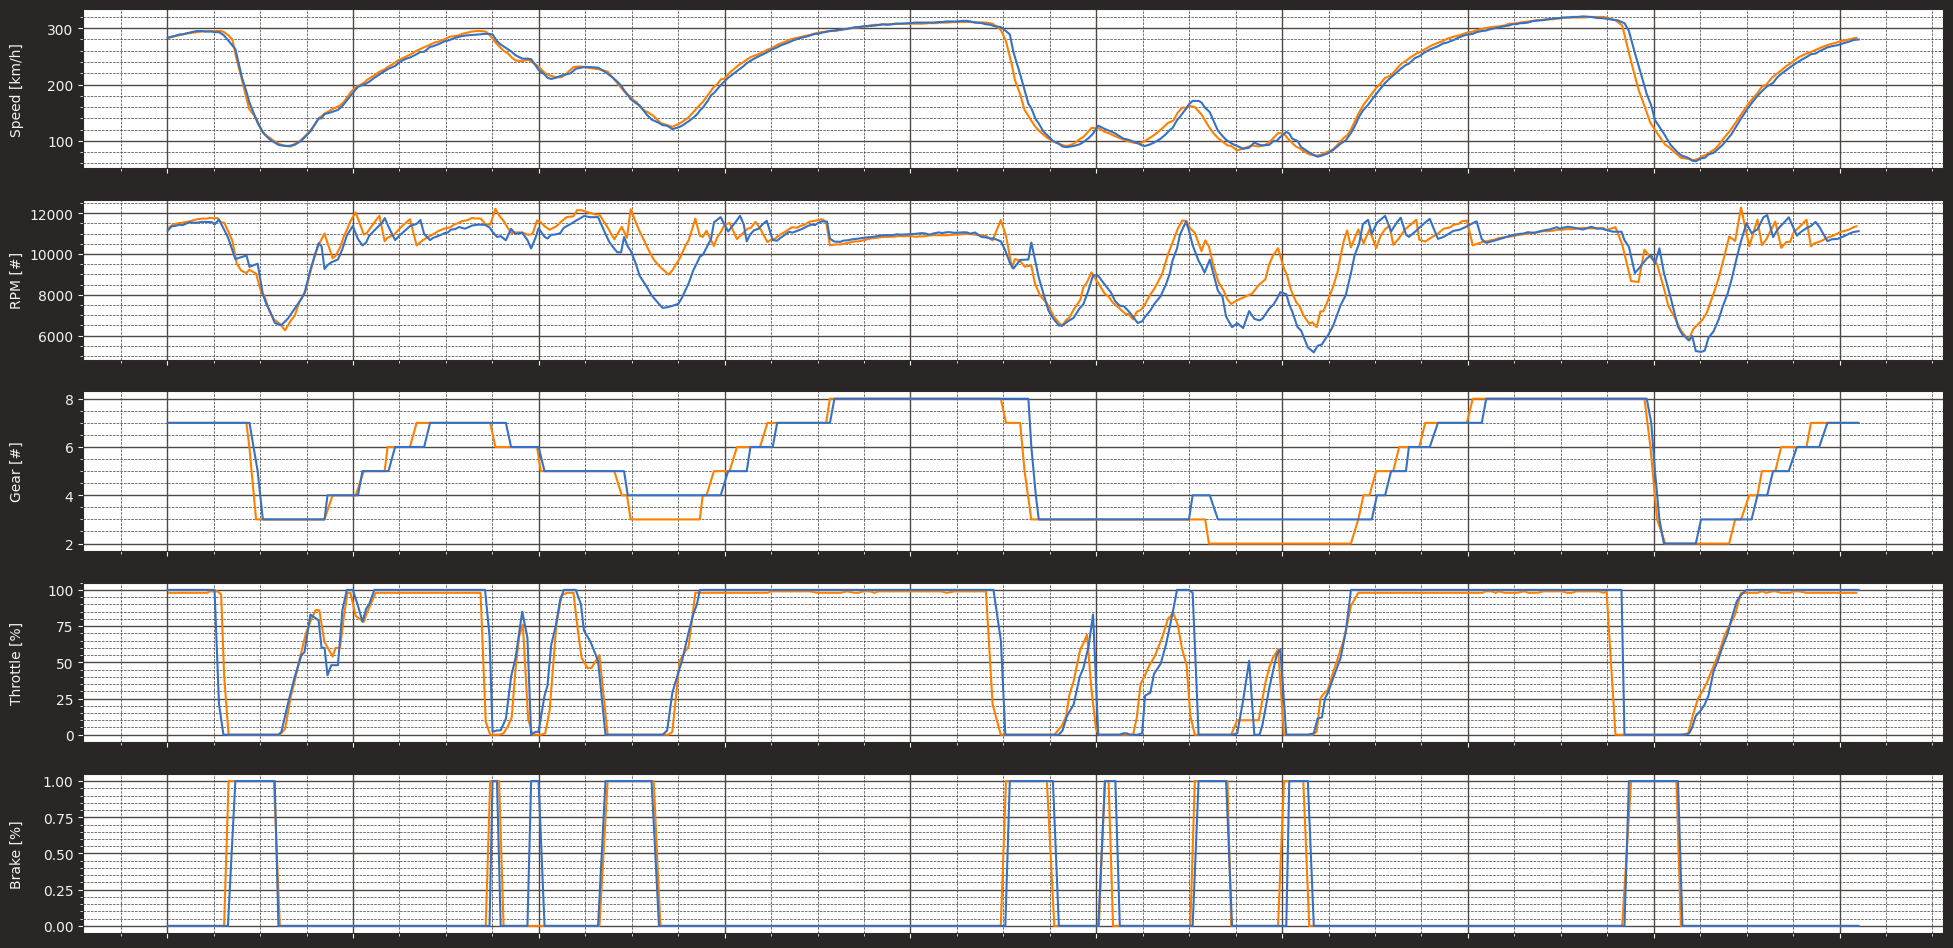

In [16]:
plotting.setup_mpl()

subplots_number = 5 #6 with DRS
fig, ax = plt.subplots(subplots_number,figsize=(24,12))

background = "white"
title_color = 'silver' # '#6441a5'

ax[0].set_facecolor(background)
ax[1].set_facecolor(background)
ax[2].set_facecolor(background)
ax[3].set_facecolor(background)
ax[4].set_facecolor(background)
#ax[5].set_facecolor(background)


ax[0].plot(telemetry_driver_1['Time'], telemetry_driver_1['Speed'], color=team_color_1, linestyle='-', label=driver_1)
ax[0].plot(telemetry_driver_2['Time'], telemetry_driver_2['Speed'], color=team_color_2, linestyle='-', label=driver_2)

ax[1].plot(telemetry_driver_1['Time'], telemetry_driver_1['RPM'], color=team_color_1, linestyle='-', label=driver_1)
ax[1].plot(telemetry_driver_2['Time'], telemetry_driver_2['RPM'], color=team_color_2, linestyle='-', label=driver_2)

ax[2].plot(telemetry_driver_1['Time'], telemetry_driver_1['nGear'], color=team_color_1, linestyle='-', label=driver_1)
ax[2].plot(telemetry_driver_2['Time'], telemetry_driver_2['nGear'], color=team_color_2, linestyle='-', label=driver_2)

ax[3].plot(telemetry_driver_1['Time'], telemetry_driver_1['Throttle'], color=team_color_1, linestyle='-', label=driver_1)
ax[3].plot(telemetry_driver_2['Time'], telemetry_driver_2['Throttle'], color=team_color_2, linestyle='-', label=driver_2)

ax[4].plot(telemetry_driver_1['Time'], telemetry_driver_1['Brake'], color=team_color_1, linestyle='-', label=driver_1)
ax[4].plot(telemetry_driver_2['Time'], telemetry_driver_2['Brake'], color=team_color_2, linestyle='-', label=driver_2)

#ax[5].plot(telemetry_driver_1['Time'], telemetry_driver_1['DRS'], color=team_color_1, linestyle='-', label=driver_1)
#ax[5].plot(telemetry_driver_2['Time'], telemetry_driver_2['DRS'], color=team_color_2, linestyle='-', label=driver_2)

ax[0].set_ylabel("Speed [km/h]")
ax[1].set_ylabel("RPM [#]")
ax[2].set_ylabel("Gear [#]")
ax[3].set_ylabel("Throttle [%]")
ax[4].set_ylabel("Brake [%]")
#ax[5].set_ylabel("DRS")

ax[0].get_xaxis().set_ticklabels([])
ax[1].get_xaxis().set_ticklabels([])
ax[2].get_xaxis().set_ticklabels([])
ax[3].get_xaxis().set_ticklabels([])
ax[4].get_xaxis().set_ticklabels([])
#ax[5].get_xaxis().set_ticklabels([])

fig.align_ylabels()

fig.legend([driver1,driver2])


plot_title = 'telemetry_comparison_'+gp+'_'+str(year)+'-'+driver1+' vs '+driver2
ax[0].title.set_text(plot_title)
plt.subplots_adjust(left=0.06 ,right=0.99, top=0.9, bottom=0.05)

plt.savefig(plot_title+'.png')